<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Техника-прямого-кодирования" data-toc-modified-id="Техника-прямого-кодирования-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Техника прямого кодирования</a></span></li><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Разделение данных на выборки</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li><li><span><a href="#Изучение-моделей-без-учёта-дисбаланса" data-toc-modified-id="Изучение-моделей-без-учёта-дисбаланса-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Изучение моделей без учёта дисбаланса</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#ROC-кривая-и-исследование-метрики-AUC-ROC" data-toc-modified-id="ROC-кривая-и-исследование-метрики-AUC-ROC-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>ROC-кривая и исследование метрики AUC-ROC</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Отток клиентов

Нужно спрогнозировать отток клиентов банка. Для решения задачи предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. Построить модель ML с предельно большим значением F1-меры (не менее 0.59).

Источник данных: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_curve, roc_auc_score
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

In [2]:
churn = pd.read_csv('/datasets/Churn.csv')
churn.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Описание данных:**
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата
- Exited — факт ухода клиента

**Вывод:** получена общая информация о датафрейме `churn`. Таблица содержит 14 столбцов и 10000 строк. В столбце `Tenure` наблюдаются 9 пропущенных значений. Также названия колонок необходимо привести к "змеиному_регистру". Датасет содержит три типа данных: `object`, `int64`, `float64`. Столбец `Exited` содержит категориальный целевой признак.

## Предобработка данных

Для обучения моделей на исходных данных датасета мне необходимо сделать следующую предобработку данных:
- удалить столбцы `RowNumber`, `CustomerId`, `Surname` так как эти данные не помогут при обучении модели;
- привести названия столбцов к нижнему регистру;
- привести названия столбцов к "змеиному_регистру";
- пропуски в столбце `Tenure` заменить медианным значением, поскольку там содержатся количественные переменные;
- преобразовать типы данных.

In [5]:
churn = churn.drop(
    ['RowNumber', 'Surname', 'CustomerId'], axis=1
) # удаление столбцов, непригодных для обучения модели

In [6]:
churn.columns = churn.columns.str.lower() # преобразвание названий столбцов к нижнему регистру

In [7]:
churn = churn.rename(columns={
    'creditscore': 'credit_score', 
    'numofproducts': 'num_of_products',
    'hascrcard': 'has_cr_card', 
    'isactivemember': 'is_active_member', 
    'estimatedsalary': 'estimated_salary'
}) # переименование столбцов в соответствии со "змеиным регистром"

In [8]:
churn['tenure'] = churn['tenure'].fillna(churn['tenure'].median()) # замена пропусков медианой

In [9]:
churn[['balance', 'estimated_salary', 'tenure']] = churn[
    ['balance', 'estimated_salary', 'tenure']
].astype('int') # преобразование типов данных

In [10]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   credit_score      10000 non-null  int64 
 1   geography         10000 non-null  object
 2   gender            10000 non-null  object
 3   age               10000 non-null  int64 
 4   tenure            10000 non-null  int64 
 5   balance           10000 non-null  int64 
 6   num_of_products   10000 non-null  int64 
 7   has_cr_card       10000 non-null  int64 
 8   is_active_member  10000 non-null  int64 
 9   estimated_salary  10000 non-null  int64 
 10  exited            10000 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 859.5+ KB


**Вывод:** все необходимые преобразования сделаны для дальнейшего обучения моделей.

## Исследование задачи

### Техника прямого кодирования

В датасете содержатся столбцы с количественными и категориальными признаками. Преобразую категориальные признаки `gender`и `geography` в количественные с помощью техники прямого кодирования One-Hot-Encoding

In [11]:
churn_ohe = pd.get_dummies(churn, drop_first = True)
churn_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


### Разделение данных на выборки

Передо мной стоит задача определения оттока клиентов банка: уйдет ли клиент в ближайшее время или нет. В исходном датасете в столбце `exited` находится целевой признак, в котором "0" - отрицательный класс (клиент не ушел), "1" - положительный (клиент ушел). Решется задача бинарной классификации.

Категориальный целевой признак определю в переменную `target`, остальные признаки - в переменную `features`.

In [12]:
features = churn_ohe.drop(['exited'], axis=1)
target = churn_ohe['exited']

Разделю датасет `churn_ohe` на три выборки:
- обучающую, на которой соответственно будут обучаться модели. Целевой признак положу в переменную `target_train`. Остальные признаки запишу в переменную `features_train`;
- валидационную, для оценки качества модели (признаки - `features_valid`, целевой признак - `target_valid`);
- тестовую, для проверки модели (признаки - `features_test`, целевой признак - `target_test`).

Обучающая, валидационная и тестовая выборки делятся в соотношении 3:1:1 с помощью функции библиотеки sklearn `train_test_split`.

In [13]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=123
)

In [14]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=123
)

Для проверки выведу размеры полученных наборов:

In [15]:
features_train.shape

(6000, 11)

In [16]:
target_train.shape

(6000,)

In [17]:
features_valid.shape

(2000, 11)

In [18]:
target_valid.shape

(2000,)

In [19]:
features_test.shape

(2000, 11)

In [20]:
target_test.shape

(2000,)

### Масштабирование признаков

Так как у всех количественных признаков разный масштаб, то воспользуюсь методом масштабирования таким как стандартизация признаков. Для этого в отдельную переменную положу список столбцов с количественными переменными.

In [21]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

In [22]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
pd.options.mode.chained_assignment = None

In [23]:
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
9696,-1.036502,-0.653217,1.091918,0.329388,-0.911674,1,1,1.717582,0,0,1
509,-0.529560,-0.185576,-1.085144,-1.222775,0.799319,1,1,0.758926,0,1,0
621,0.060149,0.095009,1.817605,1.449395,-0.911674,0,1,0.899923,0,1,0
7681,-0.095038,-0.559689,-1.085144,1.104228,0.799319,1,1,-0.762892,0,0,1
4265,0.608474,-0.653217,-0.359457,1.121959,-0.911674,0,1,-1.021336,0,0,1


### Изучение моделей без учёта дисбаланса

Исследую модели без учета дисбаланса классов и посмотрю на значение метрики F1-меры, которая является средним гармоническим метрик полноты (recall) и точности (precision).
Вычисления для каждой модели оформлю в виде функций.

In [24]:
"""Модель решающего дерева"""

def calc_decision_tree_model(
    features_train, 
    target_train, 
    features_valid, 
    target_valid, 
    class_weight=None,
):
    best_result = 0
    best_leaf = 0
    best_depth = 0
    best_split = 0

    for split in range(2, 6):
        for leaf in range(1, 6):
            for depth in range(1, 6):
                model_decision_tree = DecisionTreeClassifier(
                    min_samples_split=split, min_samples_leaf=leaf,
                    max_depth=depth, class_weight=class_weight, random_state=123
                )
                model_decision_tree.fit(features_train, target_train)
                predicted_valid = model_decision_tree.predict(features_valid)
                f1_score_dt = f1_score(target_valid, predicted_valid)
                if f1_score_dt > best_result:
                    best_result = f1_score_dt
                    best_leaf = leaf
                    best_depth = depth
                    best_split = split

    print(
        f"F1-мера модели решающего дерева на валидационной выборке: {best_result}",
        f"Минимальное количество примеров для разделения: {split}",
        f"Минимальное количество объектов в листе: {leaf}",
        f"Максимальная глубина: {depth}",
        sep="\n"
    )

In [25]:
calc_decision_tree_model(
    features_train, 
    target_train, 
    features_valid, 
    target_valid,
)

F1-мера модели решающего дерева на валидационной выборке: 0.5469255663430421
Минимальное количество примеров для разделения: 5
Минимальное количество объектов в листе: 5
Максимальная глубина: 5


In [26]:
"""Модель случайного леса с подбором гиперпараметров"""

def calc_random_forest_model(
    features_train, 
    target_train, 
    features_valid, 
    target_valid, 
    class_weight=None,
):

    best_result = 0
    best_est = 0
    best_depth = 0

    for est in range(10, 61, 10):
        for depth in range(1, 11):
            model_random_forest = RandomForestClassifier(
                n_estimators=est, max_depth=depth, class_weight=class_weight, random_state=123
            )
            model_random_forest.fit(features_train, target_train)
            predictions_valid = model_random_forest.predict(features_valid)
            f1_score_rf = f1_score(target_valid, predictions_valid)
            if f1_score_rf > best_result:
                best_result = f1_score_rf
                best_est = est
                best_depth = depth

    print(
        f"F1-мера для модели случайного леса на валидационной выборке: {best_result}",
        f"Количество деревьев: {best_est}",
        f"Максимальная глубина: {depth}",
        sep="\n"
    )

In [27]:
calc_random_forest_model(
    features_train, 
    target_train, 
    features_valid, 
    target_valid, 
)

F1-мера для модели случайного леса на валидационной выборке: 0.5588235294117647
Количество деревьев: 60
Максимальная глубина: 10


In [28]:
"""Логистическая регрессия"""

def calc_logistic_regression_model(
    features_train, 
    target_train, 
    features_valid, 
    target_valid, 
    class_weight=None,
):
    model_logistic_regression = LogisticRegression(
        solver='liblinear', 
        class_weight=class_weight, 
        random_state=123
    )
    model_logistic_regression.fit(features_train, target_train)
    predictions_valid = model_logistic_regression.predict(features_valid)
    f1_score_lr = f1_score(target_valid, predictions_valid)
    print('F1-мера для модели логистической регрессии на валидационной выборке:', f1_score_lr)

In [29]:
calc_logistic_regression_model(
    features_train, 
    target_train, 
    features_valid, 
    target_valid, 
)

F1-мера для модели логистической регрессии на валидационной выборке: 0.28190476190476194


**Вывод:** без учета дисбаланса классов не удалось достигнуть необходимого значения F1-меры. Модели недостаточно хорошо предсказывают целевой признак, поэтому буду увеличивать качество моделей с помощью различных методов.

## Борьба с дисбалансом

Классы считаются несбалансированными, когда их соотношение не равно 1:1. Посчитаю, как соотносятся классы в исходном датасете.

In [30]:
churn.query('exited == 1').shape # положительный класс "1"

(2037, 11)

In [31]:
churn.query('exited == 0').shape # отрицательный класс "0"

(7963, 11)

Наблюдается **дисбаланс классов**: соотношение положительного класса "1" к отрицательному "0" ~ 1:4.

Чтобы учесть дисбаланс классов и повысить качество моделей воспользуюсь следующими способами:
- взвешивание классов;
- увеличение выборки (техника `upsampling`);
- уменьшение выборки (техника `downsampling`).

С учетом данных техник обучу модели для выявления наилучшего качества среди рассматриваемых моделей.

### Взвешивание классов

Чтобы придать редкому классу (в данном случае, положительному) больший вес, задам алгоритму гиперпараметр `class_weight = 'balanced'`.

In [32]:
"""Модель решающего дерева"""

calc_decision_tree_model(
    features_train, 
    target_train, 
    features_valid, 
    target_valid, 
    class_weight='balanced'
)

F1-мера модели решающего дерева на валидационной выборке: 0.5630026809651474
Минимальное количество примеров для разделения: 5
Минимальное количество объектов в листе: 5
Максимальная глубина: 5


In [33]:
"""Модель случайного леса"""

calc_random_forest_model(
    features_train, 
    target_train, 
    features_valid, 
    target_valid, 
    class_weight='balanced'
)

F1-мера для модели случайного леса на валидационной выборке: 0.6197183098591549
Количество деревьев: 50
Максимальная глубина: 10


In [34]:
"""Логистическая регрессия"""

calc_logistic_regression_model(
    features_train,
    target_train, 
    features_valid, 
    target_valid, 
    class_weight='balanced',
)

F1-мера для модели логистической регрессии на валидационной выборке: 0.4553415061295972


**Вывод:** у моделей решающего дерева и логистической регрессии с заданным гиперпараметром веса класса качество моделей не дотягивает до заданного в задании. А вот у **модели случайного леса** метрика качества лучше: **F1-мера равняется ~ 0,628**. Проверю, получится ли повысить качество при использовании других техник с учетом дисбаланса классов.

### Увеличение выборки

Техника `upsampling` используется для увеличения количества объектов редкого класса.

In [35]:
"""Функция с реализацией техники upsampling"""

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=123)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

In [36]:
"""Модель решающего дерева"""

calc_decision_tree_model(
    features_upsampled, 
    target_upsampled, 
    features_valid, 
    target_valid
)

F1-мера модели решающего дерева на валидационной выборке: 0.5846867749419953
Минимальное количество примеров для разделения: 5
Минимальное количество объектов в листе: 5
Максимальная глубина: 5


In [37]:
"""Модель случайного леса"""

calc_random_forest_model(
    features_upsampled, 
    target_upsampled,
    features_valid, 
    target_valid
)

F1-мера для модели случайного леса на валидационной выборке: 0.633906633906634
Количество деревьев: 40
Максимальная глубина: 10


In [38]:
"""Логистическая регрессия"""

calc_logistic_regression_model(
    features_upsampled, 
    target_upsampled, 
    features_valid, 
    target_valid
)

F1-мера для модели логистической регрессии на валидационной выборке: 0.4753086419753087


**Вывод:** техника `upsampling` позволила добиться повышения качества моделей. **Модель случайного леса** показывает наилучшую метрику качества **F1-меры: 0,6339**.

### Уменьшение выборки

Техника `downsampling` используется, чтобы уменьшить количество объектов частого класса, т.е. убрать часть неважных вопросов.

In [39]:
"""Функция с реализацией техники downsampling"""

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=123)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=123)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=123)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.26)

In [40]:
"""Модель решающего дерева"""

calc_decision_tree_model(
    features_downsampled,
    target_downsampled, 
    features_valid, 
    target_valid
)

F1-мера модели решающего дерева на валидационной выборке: 0.5642407906558851
Минимальное количество примеров для разделения: 5
Минимальное количество объектов в листе: 5
Максимальная глубина: 5


In [41]:
"""Случайный лес"""

calc_random_forest_model(
    features_downsampled,
    target_downsampled,
    features_valid, 
    target_valid
)

F1-мера для модели случайного леса на валидационной выборке: 0.6017357762777242
Количество деревьев: 60
Максимальная глубина: 10


In [42]:
"""Логистическая регрессия"""

calc_logistic_regression_model(
    features_downsampled,
    target_downsampled,
    features_valid, 
    target_valid
)

F1-мера для модели логистической регрессии на валидационной выборке: 0.4597902097902098


**Вывод:** техника `downsampling` не позволила добиться повышения качества моделей в сравнении с upsampling. **Модель случайного леса** показала метрику качества **F1-меры: 0,6017**.

## Тестирование модели

Протестирую наилучшую модель с применением техники `upsampling` на тестовой выборке:

In [43]:
"""Модель случайного леса"""

model_random_forest = RandomForestClassifier(n_estimators = 40, max_depth = 10, random_state=123)
model_random_forest.fit(features_upsampled, target_upsampled)
predictions_test_rf = model_random_forest.predict(features_test)
f1_score_rf = f1_score(target_test, predictions_test_rf)
           
print("F1-мера для модели случайного леса на тестовой выборке:", f1_score_rf)

F1-мера для модели случайного леса на тестовой выборке: 0.6243902439024389


**Вывод:** модель случайного леса показала себя хорошо на валидационной и тестовой выборках.

### ROC-кривая и исследование метрики AUC-ROC

ROC-кривой называется взаимосвязь между долей истинно положительных ответов (True Positive Rate) и и долей ложноположительных ответов (False Positive Rate). Перебираются значения порога классификации и строится график ROC-кривой.

Построю ROC-кривую для своей модели и для случайной:

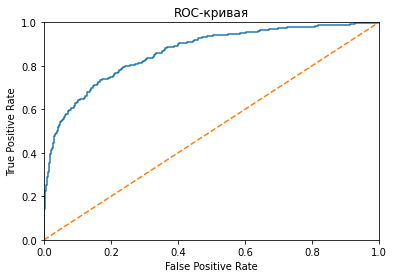

In [44]:
probabilities_test = model_random_forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Чтобы оценить, насколько модель отличается от случайной, вычислю площадь под кривой - AUC-ROC - метрика качества, которая может находиться в диапазоне от 0 до 1, а для случайной модели AUC-ROC равняется 0.5.

In [45]:
auc_roc_random_forest = roc_auc_score(target_test, probabilities_one_test)
auc_roc_random_forest

0.8636566664185215

**Вывод:** таким образом, метрика качества AUC-ROC достаточно выше 0.5, что позволяет сделать вывод, что обученная модель случайного леса предсказывает лучше случайной.

## Общий вывод

Выполнена задача разработки системы прогнозирования оттока клиентов банка с помощью модели машинного обучения - **случайного леса**. Удалось достичь заданного значения F1-меры, которое **на валидационной выборке равняется 0,6339, на тестовой - 0,6244**. При несбалансированной классификации увеличить значение метрики позволила техника `upsampling` (увеличение выборки).